In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sys import exit
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
    
df_original = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",encoding = "ISO-8859-1")
df=df_original.copy()

#filter=df_original["state"]=='Idaho'
filter=df_original["state"].isin(['Colorado','Idaho','Utah'])
df_original=df_original[filter]
filter=df_original["date"]>='2020-04-10'
df_original=df_original[filter]

filter=df["state"].isin(['Colorado','Idaho','Utah'])
df=df[filter]
filter=df["date"]>='2020-04-10'
df=df[filter]

#col_names=["fips","cases","deaths"]
#features_to_scale=df[col_names]
#scaler=StandardScaler().fit(features_to_scale.values)
#features_to_scale=scaler.transform(features_to_scale.values)
#df2=pd.DataFrame(features_to_scale,columns=col_names)
#col_names2=["county","state","date"]
#buff=df[col_names2]
#df3=pd.DataFrame(buff,columns=col_names2)

#df=pd.concat([df3,df2])
df_original=df_original.sort_values(['county'],ascending=True)
#print (df_original['deaths'].sum())
#print (df_original['deaths'].max())

def pct30(column):
        return column.quantile(0.3)

#county_counts_sorted=df_original['county'].value_counts()
#print("Occurrences:" + str(county_counts_sorted))

print("deaths by county " +str(df_original.groupby(["state","county",'date'])["cases","deaths"].agg([max])))

#results=df_original.pivot_table(index="county",columns='date', values='deaths',fill_value=0, margins=True,aggfunc=[np.mean, np.median])

#results=df_original.pivot_table(index="county",columns='date', values='deaths',fill_value=0)
#print(results)
#print(results.shape)


#plt.figure(figsize=(16, 9))
#plt.plot( color='r')
#plt.title('# of Coronavirus Cases', size=30)
#plt.xlabel('county', size=30)
#plt.ylabel('date', size=30)
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.show()

#elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.7)
#standardScaler=StandardScaler()
#pca=decomposition.PCA()
#imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
#elasticnet.fit(X_train, y_train)
#y_pred_enet = elasticnet.predict(X_test)

#steps = [('imputation', imputer),
#         ('scalar', standardScaler),
#         ('elasticnet', elasticnet)]
#steps = [('pca', pca),
#         ('sc', standardScaler),
#         ('elasticnet', elasticnet)]

          
#pipeline = Pipeline(steps)

#n_components = list(range(1,X.shape[1]+1,1))
#normalize = [True, False]
#selection = ['cyclic', 'random']
#parameters = dict(pca__n_components=n_components,
#                      elasticnet__normalize=normalize,
#                      elasticnet__selection=selection)
# Create train and test sets


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
#svm_confirmed.fit(X_train, y_train)
#svm_pred = svm_confirmed.predict(future_forcast)

#svm_test_pred = svm_confirmed.predict(X_test)
#plt.plot(y_test)
#plt.plot(svm_test_pred)
#plt.legend(['Test Data', 'SVM Predictions'])
#print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

# Create the GridSearchCV object: gm_cv
#gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
#elasticnet.fit(X_train,y_train)

# Compute and print the metrics
#r2 = gm_cv.score(X_test, y_test)          


#mojave_homelessness = homelessness[(homelessness['state']).isin(canu)]

deaths by county                            cases deaths
                             max    max
state    county date                   
Colorado Adams  2020-04-10   543     23
                2020-04-11   593     25
                2020-04-12   647     26
                2020-04-13   693     26
                2020-04-14   726     27
...                          ...    ...
Utah     Weber  2020-04-10    90      1
                2020-04-11    84      1
                2020-04-12    87      1
                2020-04-13    91      1
                2020-04-14    96      1

[561 rows x 2 columns]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [8]:
results=df_original.pivot_table(index=["state","county"],columns='date', values=['deaths','cases'],fill_value=0)
df_results=pd.DataFrame(results.to_records())
df_results.reset_index()

state_dummy=pd.get_dummies(df_results['state'])
county_dummy=pd.get_dummies(df_results['county'])

#df_results=pd.concat(df_results,state_dummy,county_dummy)

#df_results.index(['state','county'])
print(results.head(5))

print(df_results.shape)
#print(results.isna())
#print(df_original)
#print(results.head(5))

#Print(df_results.head(1000))
#X=df_results[:,1]
#y=df_results[:,0]
#print(X)



                        cases                                              \
date               2020-04-10 2020-04-11 2020-04-12 2020-04-13 2020-04-14   
state    county                                                             
Colorado Adams            543        593        647        693        726   
         Alamosa            7          7          7          7          7   
         Arapahoe         931        998       1083       1142       1183   
         Archuleta          6          6          6          6          6   
         Baca               9         10         10         10         10   

                       deaths                                              
date               2020-04-10 2020-04-11 2020-04-12 2020-04-13 2020-04-14  
state    county                                                            
Colorado Adams             23         25         26         26         27  
         Alamosa            2          2          2          2          2  
   

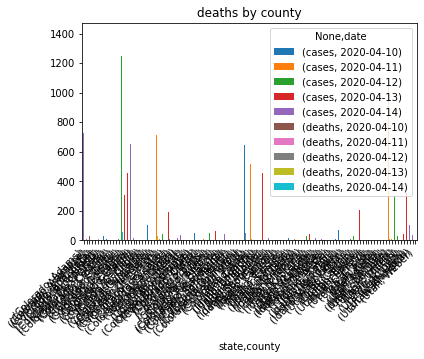

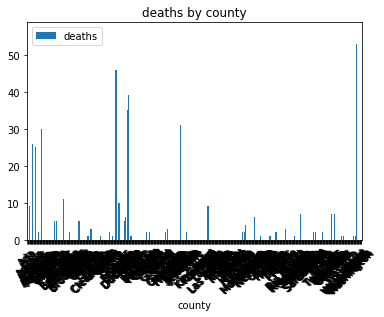

<Figure size 432x288 with 0 Axes>

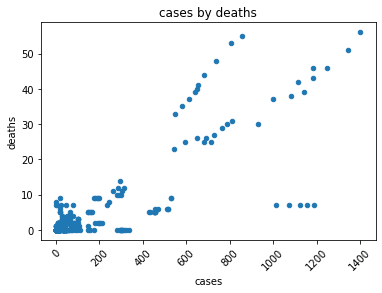

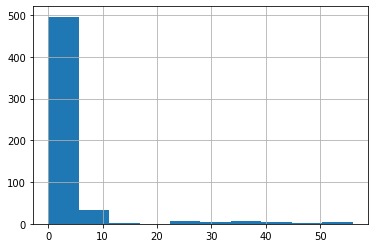

In [10]:
results.plot(kind="bar", title="deaths by county")
plt.xticks(rotation=45, ha='right')
plt.show()

df_original.plot(kind="bar", 
             x="county",
             y="deaths",
             title="deaths by county",rot=45)
#plt.xticks(rotation=45, ha='right')
plt.show()

plt.clf()

results.plot(kind="scatter", 
             x="cases",
             y="deaths",
             title="cases by deaths",rot=45)
#plt.xticks(rotation=45, ha='right')
plt.show()

df_original['deaths'].hist()
plt.show()


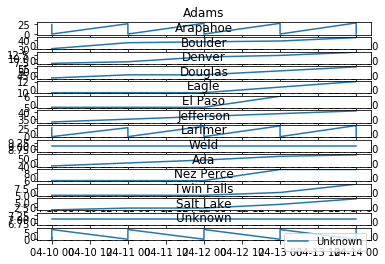

In [61]:
#df.set_index(['state','county'])
#df=df[df['deaths']>20]
deaths=df['deaths'].tolist()
cases=df['cases'].tolist()
counties=df['county'].tolist()
counties=df.groupby(['state','county'])['deaths'].max()>5
#counties=df.groupby(['state','county'])
#counties.apply(lambda x: x['deaths'].max()>20)
#filtered=counties.filter(lambda x: x>10.)
#print(filtered)


counties=counties.loc[counties.values==True]
#print(counties)
counties.reset_index()
#print(counties)
counties=pd.merge(df,counties,how='inner',on=['state','county'])
counties=counties[counties['deaths_y']==True]
#print(counties)
counties=counties['county'].unique()

rows=len(counties)
fig,ax = plt.subplots(rows,1)
index=0

for item in counties:
    deaths=df[df['county']==item]
    deaths=deaths['deaths'].tolist()
    cases=df[df['county']==item]
    cases=cases['cases'].tolist()
    dates=df[df['county']==item]
    #dates=pd.to_datetime(dates['date']).dt.date.unique().tolist()
    dates=pd.to_datetime(dates['date']).dt.date.tolist()
    #print(dates)
    #dates=dates['date'].unique()
    ax[index].plot(dates,deaths,label=item)
    ax[index].set_title(item)
 
    index+=1
    #plt.plot(dates,deaths,label=item)
    
plt.legend()  
plt.show()

        county  deaths  cases
13      Denver      56   1402
55        Weld      55    858
2     Arapahoe      43   1183
16     El Paso      41    652
25   Jefferson      31    809
..         ...     ...    ...
54  Washington       0      5
50  San Miguel       0     12
49    Saguache       0      3
47  Rio Grande       0      5
62      Bonner       0      4

[114 rows x 3 columns]


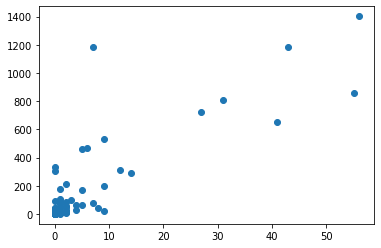

In [6]:
deaths=df.groupby(['state','county'])['deaths'].max().tolist()
cases =df.groupby(['state','county'])['cases'].max().tolist()
county=df.groupby(['state','county'])['county'].max().tolist()

#print(county)
#print(deaths)
#print(len(county))

dict={'county':county,
     'deaths':deaths,
     'cases':cases}
combined=pd.DataFrame(dict)
combined=combined.sort_values('deaths',ascending=False)


print(combined)


# Make scatter plot
plt.scatter(deaths,cases)
plt.show()

The correlation between x and y is 1.00


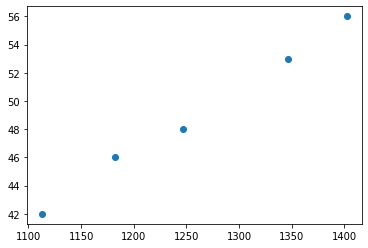

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [42]:
import statsmodels.api as sm

deaths=df.groupby(['date'])['deaths'].max()
cases =df.groupby(['date'])['cases'].max()

correlation = cases.corr(deaths)
print("The correlation between x and y is %4.2f" %(correlation))

dfx = pd.DataFrame(deaths, columns=['deaths'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

result=sm.OLS(cases,dfx1).fit()


#plt.scatter(cases,result)

plt.scatter(cases,deaths)
plt.show()


days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-20]
print(adjusted_dates)

In [43]:
import numpy as np

input_data=np.array([2,3])
weights={'node_0':np.array([1,1]),
        'node_1':np.array([-1,1]),
        'output':np.array([2,-1])}
node_0_value=(input_data * weights['node_0']).sum()
node_1_value=(input_data * weights['node_1']).sum()

hidden_layer_values=np.array([node_0_value,node_1_value])
print(hidden_layer_values)

output=(hidden_layer_values * weights['output']).sum()
print(output)

#tanh

node_0_value=(input_data * weights['node_0']).sum()
node_0_output=np.tanh(node_0_value)
node_1_value=(input_data * weights['node_1']).sum()
node_1_output=np.tanh(node_1_value)
hidden_layer_values=np.array([node_0_output,node_1_output])
print(hidden_layer_values)

output=(hidden_layer_values * weights['output']).sum()
print(output)

#adding an activation function
#ReLU (Rectified Linear Activation) 0 if x<0 and x if X>0


[5 1]
9
[0.9999092  0.76159416]
1.2382242525694254


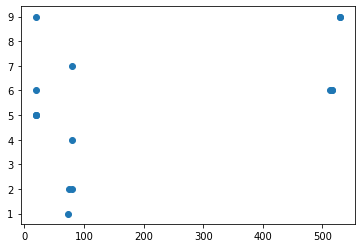

4


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:69: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
10/10 [==============================] - 0s 10ms/step - loss: 42.1999 - accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 143us/step - loss: 41.6166 - accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 150us/step - loss: 40.9609 - accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 150us/step - loss: 40.3017 - accuracy: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 200us/step - loss: 39.6487 - accuracy: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 151us/step - loss: 39.0155 - accuracy: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 100us/step - loss: 38.4149 - accuracy: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 198us/step - loss: 37.8219 - accuracy: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 150us/step - loss: 37.2276 - accuracy: 0.0000e+00
Epoch 10/1000
10/10 [=================

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 0s 200us/step - loss: 15.3852 - accuracy: 0.0000e+00
Epoch 39/1000
10/10 [==============================] - 0s 150us/step - loss: 14.4871 - accuracy: 0.0000e+00
Epoch 40/1000
10/10 [==============================] - 0s 200us/step - loss: 13.5945 - accuracy: 0.0000e+00
Epoch 41/1000
10/10 [==============================] - 0s 100us/step - loss: 12.7119 - accuracy: 0.0000e+00
Epoch 42/1000
10/10 [==============================] - 0s 150us/step - loss: 11.8338 - accuracy: 0.0000e+00
Epoch 43/1000
10/10 [==============================] - 0s 152us/step - loss: 10.9816 - accuracy: 0.0000e+00
Epoch 44/1000
10/10 [==============================] - 0s 196us/step - loss: 10.1420 - accuracy: 0.0000e+00
Epoch 45/1000
10/10 [==============================] - 0s 250us/step - loss: 9.3271 - accuracy: 0.0000e+00
Epoch 46/1000
10/10 [==============================] - 0s 145us/step - loss: 8.5465 - accuracy: 0.0000e+00
Epoch 47/1000
10/10 [=======================

Epoch 118/1000
10/10 [==============================] - 0s 154us/step - loss: 2.2284 - accuracy: 0.1000
Epoch 119/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2286 - accuracy: 0.1000
Epoch 120/1000
10/10 [==============================] - 0s 193us/step - loss: 2.2289 - accuracy: 0.1000
Epoch 121/1000
10/10 [==============================] - 0s 91us/step - loss: 2.2291 - accuracy: 0.1000
Epoch 122/1000
10/10 [==============================] - 0s 152us/step - loss: 2.2293 - accuracy: 0.1000
Epoch 123/1000
10/10 [==============================] - 0s 140us/step - loss: 2.2294 - accuracy: 0.1000
Epoch 124/1000
10/10 [==============================] - 0s 203us/step - loss: 2.2294 - accuracy: 0.1000
Epoch 125/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2294 - accuracy: 0.1000
Epoch 126/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2294 - accuracy: 0.1000
Epoch 127/1000
10/10 [==============================] - 0s 150us/

Epoch 197/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 198/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 199/1000
10/10 [==============================] - 0s 200us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 200/1000
10/10 [==============================] - 0s 400us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 201/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 202/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 203/1000
10/10 [==============================] - 0s 247us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 204/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 205/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2269 - accuracy: 0.1000
Epoch 206/1000
10/10 [==============================] - 0s 100us

Epoch 276/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2252 - accuracy: 0.1000
Epoch 277/1000
10/10 [==============================] - 0s 198us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 278/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 279/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 280/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 281/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 282/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 283/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 284/1000
10/10 [==============================] - 0s 145us/step - loss: 2.2251 - accuracy: 0.1000
Epoch 285/1000
10/10 [==============================] - 0s 152us

Epoch 355/1000
10/10 [==============================] - 0s 190us/step - loss: 2.2237 - accuracy: 0.1000
Epoch 356/1000
10/10 [==============================] - 0s 199us/step - loss: 2.2237 - accuracy: 0.1000
Epoch 357/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2237 - accuracy: 0.1000
Epoch 358/1000
10/10 [==============================] - 0s 97us/step - loss: 2.2237 - accuracy: 0.1000
Epoch 359/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2237 - accuracy: 0.1000
Epoch 360/1000
10/10 [==============================] - 0s 152us/step - loss: 2.2236 - accuracy: 0.1000
Epoch 361/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2236 - accuracy: 0.1000
Epoch 362/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2236 - accuracy: 0.1000
Epoch 363/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2236 - accuracy: 0.1000
Epoch 364/1000
10/10 [==============================] - 0s 203us/

Epoch 434/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2225 - accuracy: 0.1000
Epoch 435/1000
10/10 [==============================] - 0s 252us/step - loss: 2.2225 - accuracy: 0.1000
Epoch 436/1000
10/10 [==============================] - 0s 199us/step - loss: 2.2225 - accuracy: 0.1000
Epoch 437/1000
10/10 [==============================] - 0s 149us/step - loss: 2.2225 - accuracy: 0.1000
Epoch 438/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2224 - accuracy: 0.1000
Epoch 439/1000
10/10 [==============================] - 0s 146us/step - loss: 2.2224 - accuracy: 0.1000
Epoch 440/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2224 - accuracy: 0.1000
Epoch 441/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2224 - accuracy: 0.1000
Epoch 442/1000
10/10 [==============================] - 0s 154us/step - loss: 2.2224 - accuracy: 0.1000
Epoch 443/1000
10/10 [==============================] - 0s 200us

Epoch 513/1000
10/10 [==============================] - 0s 198us/step - loss: 2.2211 - accuracy: 0.1000
Epoch 514/1000
10/10 [==============================] - 0s 149us/step - loss: 2.2211 - accuracy: 0.1000
Epoch 515/1000
10/10 [==============================] - 0s 400us/step - loss: 2.2211 - accuracy: 0.1000
Epoch 516/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2211 - accuracy: 0.1000
Epoch 517/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2211 - accuracy: 0.1000
Epoch 518/1000
10/10 [==============================] - 0s 144us/step - loss: 2.2210 - accuracy: 0.1000
Epoch 519/1000
10/10 [==============================] - 0s 194us/step - loss: 2.2210 - accuracy: 0.1000
Epoch 520/1000
10/10 [==============================] - 0s 200us/step - loss: 2.2210 - accuracy: 0.1000
Epoch 521/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2210 - accuracy: 0.1000
Epoch 522/1000
10/10 [==============================] - 0s 100us

Epoch 592/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2195 - accuracy: 0.1000
Epoch 593/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2195 - accuracy: 0.1000
Epoch 594/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2195 - accuracy: 0.1000
Epoch 595/1000
10/10 [==============================] - 0s 196us/step - loss: 2.2194 - accuracy: 0.1000
Epoch 596/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2194 - accuracy: 0.1000
Epoch 597/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2194 - accuracy: 0.1000
Epoch 598/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2194 - accuracy: 0.1000
Epoch 599/1000
10/10 [==============================] - 0s 99us/step - loss: 2.2194 - accuracy: 0.1000
Epoch 600/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2193 - accuracy: 0.1000
Epoch 601/1000
10/10 [==============================] - 0s 150us/

Epoch 671/1000
10/10 [==============================] - 0s 200us/step - loss: 2.2173 - accuracy: 0.1000
Epoch 672/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2173 - accuracy: 0.1000
Epoch 673/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2173 - accuracy: 0.1000
Epoch 674/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2172 - accuracy: 0.1000
Epoch 675/1000
10/10 [==============================] - 0s 153us/step - loss: 2.2172 - accuracy: 0.1000
Epoch 676/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2172 - accuracy: 0.1000
Epoch 677/1000
10/10 [==============================] - 0s 201us/step - loss: 2.2171 - accuracy: 0.1000
Epoch 678/1000
10/10 [==============================] - 0s 301us/step - loss: 2.2171 - accuracy: 0.1000
Epoch 679/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2171 - accuracy: 0.1000
Epoch 680/1000
10/10 [==============================] - 0s 100us

Epoch 750/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2149 - accuracy: 0.1000
Epoch 751/1000
10/10 [==============================] - 0s 251us/step - loss: 2.2149 - accuracy: 0.1000
Epoch 752/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2148 - accuracy: 0.1000
Epoch 753/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2148 - accuracy: 0.1000
Epoch 754/1000
10/10 [==============================] - 0s 246us/step - loss: 2.2148 - accuracy: 0.1000
Epoch 755/1000
10/10 [==============================] - 0s 200us/step - loss: 2.2147 - accuracy: 0.1000
Epoch 756/1000
10/10 [==============================] - 0s 149us/step - loss: 2.2147 - accuracy: 0.1000
Epoch 757/1000
10/10 [==============================] - 0s 450us/step - loss: 2.2147 - accuracy: 0.1000
Epoch 758/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2146 - accuracy: 0.1000
Epoch 759/1000
10/10 [==============================] - 0s 250us

Epoch 829/1000
10/10 [==============================] - 0s 350us/step - loss: 2.2116 - accuracy: 0.1000
Epoch 830/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2116 - accuracy: 0.1000
Epoch 831/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2115 - accuracy: 0.1000
Epoch 832/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2115 - accuracy: 0.1000
Epoch 833/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2114 - accuracy: 0.1000
Epoch 834/1000
10/10 [==============================] - 0s 251us/step - loss: 2.2114 - accuracy: 0.1000
Epoch 835/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2113 - accuracy: 0.1000
Epoch 836/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2113 - accuracy: 0.1000
Epoch 837/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2113 - accuracy: 0.1000
Epoch 838/1000
10/10 [==============================] - 0s 144us

Epoch 908/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2077 - accuracy: 0.1000
Epoch 909/1000
10/10 [==============================] - 0s 151us/step - loss: 2.2076 - accuracy: 0.1000
Epoch 910/1000
10/10 [==============================] - 0s 200us/step - loss: 2.2076 - accuracy: 0.1000
Epoch 911/1000
10/10 [==============================] - 0s 201us/step - loss: 2.2075 - accuracy: 0.1000
Epoch 912/1000
10/10 [==============================] - 0s 94us/step - loss: 2.2075 - accuracy: 0.1000
Epoch 913/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2074 - accuracy: 0.1000
Epoch 914/1000
10/10 [==============================] - 0s 300us/step - loss: 2.2074 - accuracy: 0.1000
Epoch 915/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2073 - accuracy: 0.1000
Epoch 916/1000
10/10 [==============================] - 0s 152us/step - loss: 2.2072 - accuracy: 0.1000
Epoch 917/1000
10/10 [==============================] - 0s 100us/

Epoch 987/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2025 - accuracy: 0.1000
Epoch 988/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2024 - accuracy: 0.1000
Epoch 989/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2023 - accuracy: 0.1000
Epoch 990/1000
10/10 [==============================] - 0s 100us/step - loss: 2.2022 - accuracy: 0.1000
Epoch 991/1000
10/10 [==============================] - 0s 250us/step - loss: 2.2022 - accuracy: 0.1000
Epoch 992/1000
10/10 [==============================] - 0s 150us/step - loss: 2.2021 - accuracy: 0.1000
Epoch 993/1000
10/10 [==============================] - 0s 300us/step - loss: 2.2020 - accuracy: 0.1000
Epoch 994/1000
10/10 [==============================] - 0s 143us/step - loss: 2.2019 - accuracy: 0.1000
Epoch 995/1000
10/10 [==============================] - 0s 300us/step - loss: 2.2019 - accuracy: 0.1000
Epoch 996/1000
10/10 [==============================] - 0s 100us

In [188]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.datasets import load_iris
from keras.optimizers import SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#print(df.keys())
filter=df["date"]>='2020-03-1'
df_learn=df[filter]
#filter=df["state"].isin(['Colorado','Idaho','Utah'])
filter=df["state"].isin(['Idaho'])
#filter=df["county"].isin(['Arapahoe'])
df_learn=df_learn[filter]

counties=df_learn.groupby(['state','county'])['deaths'].max()>5
counties=counties.loc[counties.values==True]
counties.reset_index()
df_learn=pd.merge(df_learn,counties,how='inner',on=['state','county'])
df_learn=df_learn[df_learn['deaths_y']==True]

df_learn=pd.concat([df_learn,pd.get_dummies(df_learn['county'])], axis=1)
df_cases=df_learn.pop('cases')
df_learn['cases']=df_cases
#print(df_learn.shape)
#print(df_learn.head(5))

dataset=np.nan_to_num(df_learn.values)
#print(dataset)
last=df_learn.shape[1]
predictors=dataset[:,6:last] #counties and cases
target=dataset[:,4] #deaths

#print(predictors)
#print(target)

fig,ax = plt.subplots(1,1)
ax.scatter(predictors[:,-1],target)
plt.show()

min_max_scaler= preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(predictors)
#print(X_scale)


n_cols=predictors.shape[1]
print(n_cols)

X_train, X_test, y_train, y_test= train_test_split(X_scale,target,test_size=0.3)

early_stopping_monitor=EarlyStopping(patience=3)

model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
#model.add(Dense(1000, activation='relu'))
model.add(Dense(1))

#myOptimizer=SGD(0.1)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=myOptimizer,  metrics=['accuracy'])
model.fit(X_train, y_train,callbacks=[early_stopping_monitor],  nb_epoch=1000)

predictionResults=model.predict(X_test)

index=0
for item in predictionResults:
    print(str(predictionResults[index])+":"+str(y_test[index]))
    index+=1

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train, y_train)
y_pred=svm_confirmed.predict(X_test)

#for i in range(len(y_test)):
#        print("X=%s, Test Label=%s Predicted=%s" %(X_test[i],y_test[i],y_pred[i]))
        
#svm_pred = svm_confirmed.predict(future_forcast)    

#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'])
#plt.show()

#plt.plot(hist.history['acc'])plt.plot(hist.history['val_acc'])plt.title('Model accuracy')plt.ylabel('Accuracy')plt.xlabel('Epoch')plt.legend(['Train', 'Val'], loc='lower right')plt.show()
